## Regression with XGBoost

### Decision trees as base learners

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('house-prices.csv')

In [4]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [5]:
X = df.drop(columns=['SalePrice'])
y = df.SalePrice

### Decision trees as base learners

In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)


xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123, booster="gbtree")


xg_reg.fit(X_train, y_train)


preds = xg_reg.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 28106.463641


### Linear base learners

In [8]:

DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)


params = {"booster":"gblinear", "objective":"reg:linear"}


xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)


preds = xg_reg.predict(DM_test)


rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[15:06:50] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 45499.725678


### Evaluating model quality

In [10]:

housing_dmatrix = xgb.DMatrix(data=X, label=y)


params = {"objective":"reg:linear", "max_depth":4}


cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)


print(cv_results)


print((cv_results["test-mae-mean"]).tail(1))

[15:17:05] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:05] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:05] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:17:05] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.464844     668.322783  127633.988281   2404.014089
1    89770.048829     456.960792   90122.501953   2107.912810
2    63580.789062     263.409865   64278.560547   1887.569243
3    45633.155274     151.883052   46819.168945   1459.817731
4    33587.090820      86.999396   35670.647461   1140.608356
4    35670.647461
Name: 

### Using regularization in XGBoost

In [11]:

housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]


params = {"objective":"reg:linear","max_depth":3}


rmses_l2 = []


for reg in reg_params:

    
    params["lambda"] = reg
    
    
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])


print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

[15:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2          rmse
0    1  52275.357421
1   10  57746.062500


It looks like as as the value of 'lambda' increases, so does the RMSE.

### Visualizing individual XGBoost trees

In [ ]:
!pip install graphviz
!brew install graphviz

In [16]:
import matplotlib.pyplot as plt

[15:48:05] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


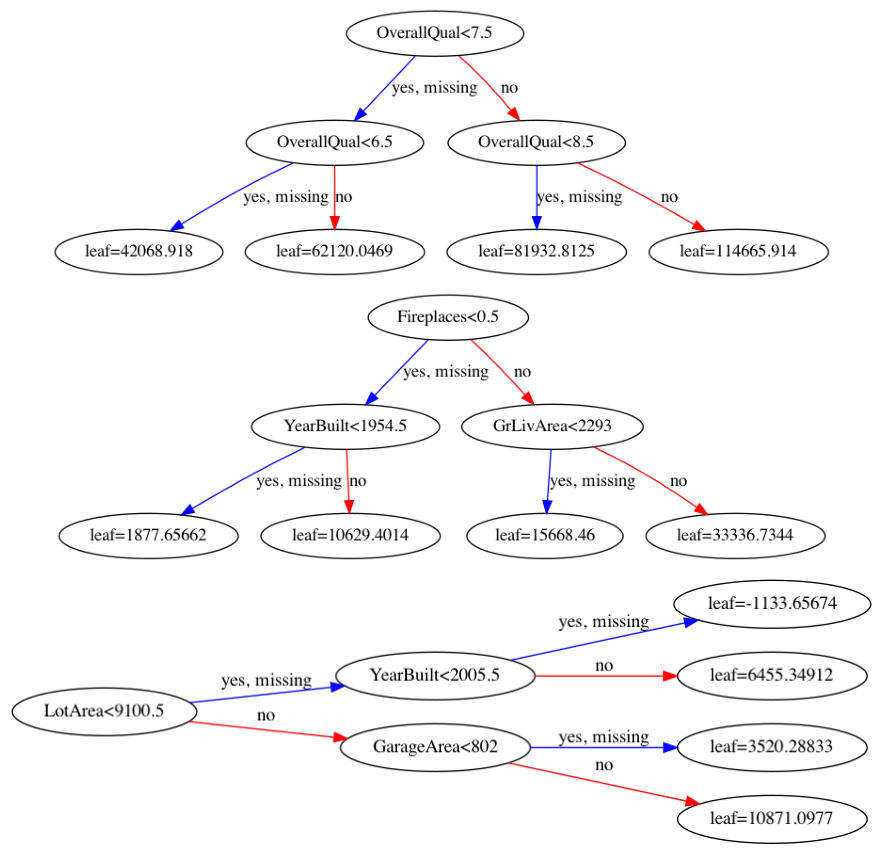

In [20]:

params = {"objective":"reg:linear", "max_depth":2}


xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

fig, axes = plt.subplots(3,1,figsize=(20,12))


xgb.plot_tree(xg_reg, num_trees=0, ax=axes[0])


xgb.plot_tree(xg_reg, num_trees=4, ax=axes[1])


xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR", ax=axes[-1])
fig.tight_layout()

### Visualizing feature importances: What features are most important in my dataset

[15:48:10] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


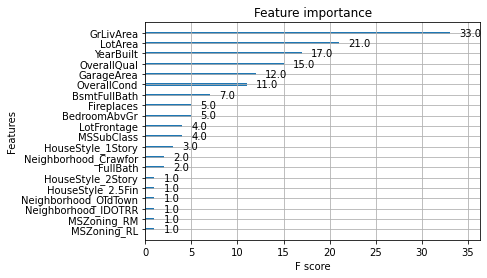

In [21]:

params = {"objective":"reg:linear", "max_depth":4}


xg_reg = xgb.train(params = params, dtrain=housing_dmatrix, num_boost_round=10)


xgb.plot_importance(xg_reg)
plt.show()